In [1]:
function DoubPen(t,x)
    #this function defines the motion of a double pendulum using the Lagrangian
    #x = [θ1 θ2 ω1 ω2]
    #I need to definel1,l2,m1,m2
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    
    dx = zeros(4)
    
    dx[1] = x[3]
    dx[2] = x[4]
    
    num1 = sin(x[1]-x[2])*(l1*cos(x[1]-x[2])*x[3]^2+x[4]^2)
    dem1 = 2*l2*(1+m1-cos(x[1]-x[2])^2)
    num2 = (1+2*m1)*sin(x[1])+sin(x[1]-2*x[2])
    dem2 = l1*(1+m1-cos(x[1]-x[2])^2)
    
    dx[3] = (num1/dem1)-(num2/dem2)
    
    num3 = sin(x[1]-x[2])*(1+m1)*(cos(x[1]+l1*x[3]^2)+cos(x[1]-x[2])*x[4]^2)
    dem3 = 1+m1-cos(x[1]-x[2])^2
    
    dx[4] = num3/dem3
    
    dx
end

DoubPen (generic function with 1 method)

In [2]:
function rungekutta4(f, y₀, Δt, t₀, t₁) 
   
    # fix up Δt so it evenly divides time interval
    N = convert(Int64, round((t₁ - t₀)/Δt))
    Δt = (t₁ - t₀)/N
    Δt2 = Δt/2
    Δt6 = Δt/6
    
    t = range(t₀, stop=t₁, length=N+1)

    y = zeros(N+1, length(y₀))
    y[1,:] = y₀

    for n = 1:N
        yn = y[n,:]
        tn = t[n]
        s1 = f(tn, yn)
        s2 = f(tn + Δt2, yn + Δt2*s1)
        s3 = f(tn + Δt2, yn + Δt2*s2)
        s4 = f(tn + Δt,  yn + Δt *s3)

        y[n+1, :] =  yn + Δt6*(s1+2s2 + 2s3 + s4) # RK4 update formula
    end
    t,y
end



In [5]:
using Plots

In [47]:
x = [0.4,0.7,0.1,0.1]
Δt=0.01;
t1=0;
t2=50;
t,y = rungekutta4(DoubPen,x,Δt,t1,t2)

(0.0:0.01:50.0, [0.4 0.7 0.1 0.1; 0.400985 0.700982 0.0969299 0.0964685; … ; -0.308797 -0.525113 0.242557 0.357018; -0.306359 -0.521528 0.245017 0.360133])

In [6]:
function lagrangian(f,x)
    Δt=0.01;
    t1=0;
    t2=50;
    t,y = rungekutta4(f,x,Δt,t1,t2)

    #The lagrangian of the double pendulum system will be computed here
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    L = 0
    Lagrangian = []
    nIterations = size(y)[1]
        for n = 1:nIterations
            L = (1/2)*(l1^2*(m1+m2)*y[n,3]^2+l2^2*m2*y[n,4]^2+2*l1*m2*cos(y[n,1]-y[n,2])*y[n,3]*y[n,4])+l1*(m1+m2)*cos(y[n,1])+l2*m2*cos(y[n,2])
            push!(Lagrangian,L)
        end
    Lagrangian
end

lagrangian (generic function with 1 method)

In [7]:
function poincaresection(E,x1)
    #this function will recreate the plot, ϕ2 vs ω2 found in 
    #"A Numerical Analysis of the Double Pendulum System" by Stachowiak and Okada
    
    x = zeros(4)
    x[1] = x1
    
    #for ϕ1 = 0, ϕ2 = acos(L-8*cosϕ1)
    
    L = -1*(E+0.01)
    x[2] = acos(L-8*cos(x[1]))
    
    Δt=0.01;
    t1=0;
    t2=3000;
    t,y = rungekutta4(DoubPen,x,Δt,t1,t2)
    
    #memory allocation
    y = copy(y)
    t = copy(t)
    ncross = []
    ncrossing = []
    t0 = []
    y1 = []
    y2 = []
    phi2 = 0
    omega2 = 0
    #loop over ϕ1 to find roots where ϕ1 equals 0 and ω1=dϕ1 >0
    for n = 1:size(y,1)
        
        #we want roots with a positive slope, so if the previous ϕ1 is negative and the ϕ1 is positive, 
        #then we get a root with a positive slope
        
        if (abs(y[n,1])<1e-4) && (y[n,3]>0) #(y[n-1,1]<0) && (y[n,1]>0)
            
            #the index of the neg and positive number is pushed into a pair of empty vectors
            #push!(ncross,n)
            #push!(ncrossing,n-1)

            push!(ncross,n)
            
        end 
    end
    
    for n = 1:size(ncross,1)
        
        #the interpolation for the root is found here
        #t0 = t[ncross[n]]+((-y[ncross[n],1])*(t[ncrossing[n]]-t[ncross[n]]))/(y[ncrossing[n],1]-y[ncross[n],1])
        
        #the value of ϕ2 and ω2 will be calculated at t where ϕ1=0
        #phi2 = y[ncrossing[n],2] + ((y[ncross[n],2]-y[ncrossing[n],2])*(t0-t[ncrossing[n]]))/(t[ncross[n]]-t[ncrossing[n]])
        #omega2 = y[ncrossing[n],4] + ((y[ncross[n],4]-y[ncrossing[n],4])*(t0-t[ncrossing[n]]))/(t[ncross[n]]-t[ncrossing[n]])
        
        phi2 = y[ncross[n],2]
        omega2 = y[ncross[n],4]
        
        #ϕ2 and ω2 will be pushed into an empty vector
        push!(y1,phi2)
        push!(y2,omega2)
    end
    
    #the two vectors containing ϕ2 and ω2 for the poincare section will be plotted here
    plot!(y1,y2,seriestype= :scatter, xlim = (-0.15,0.15),ylim = (-0.2,0.15), markersize= 0.1, legend= :false)
end

poincaresection (generic function with 1 method)

In [ ]:
E = -9
x1 = -0.015
poincaresection(E,x1)

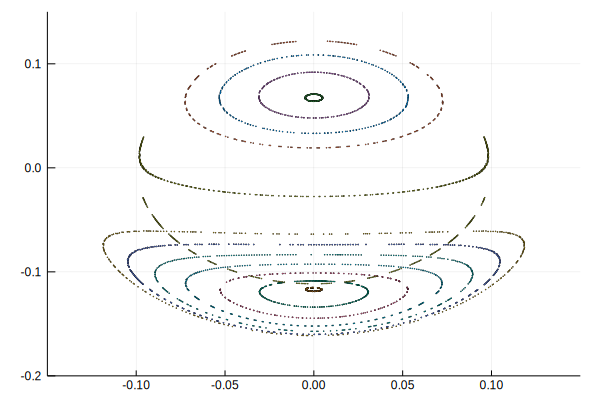

In [148]:
E = -9
x1 = -0.015
poincaresection(E,x1)

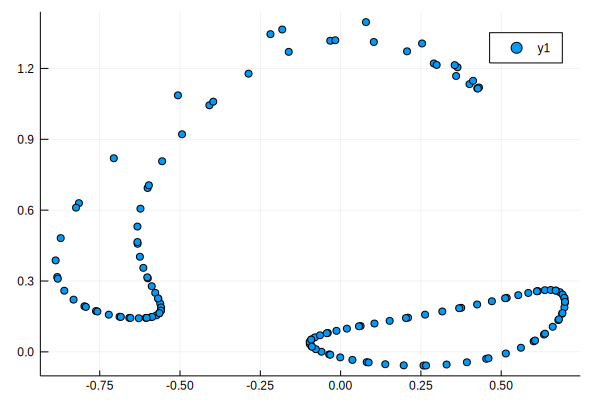

In [60]:
x = [0.3,0.35,0.3,-0.3]
poincaresection(x)

In [60]:
function Newton(f, x0)
    x = copy(x0)
    x0 = copy(x0)
    fx0 = f(x0)
    df = zeros(m,m)
    n = copy(n)
    
    ϵ = 0.0001
    cnt = 0
    
    for Niterations = 1:n
        #here the derivative is calculated numerically
        for j = 1:length(fx0)
            x_ϵ = copy(x0)
            
            x_ϵ[j] += ϵ
        
            fx_ϵ = f(x_ϵ)
        
            for i = 1:m
                df[i,j] = (fx_ϵ[i] - fx0[i])/ϵ
            end
        end
        #the newton search will be computed here
        
        Δx = -df\fx0
        
        x0 += Δx
        
        cnt = cnt + 1
        
        fx0 = f(x0)
    end
    x0
end

Newton (generic function with 1 method)